# Linguistic Networks. Lab 1.

#### Anastasia Romanova

In [1]:
import nltk
from nltk.util import ngrams
from nltk import word_tokenize
from nltk.corpus import stopwords
import re

In [2]:
from collections import Counter
from operator import itemgetter

In [3]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
sns.set(style="whitegrid")

In [5]:
import sys
print(sys.version)
print(nltk.__version__)
print(nx.__version__)
print(pd.__version__)
print(sns.__version__)

3.5.2 |Anaconda 2.4.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
3.2.1
1.10
0.19.1
0.7.1


## 1. Rank - Frequency plot

### Rank - Frequency plot for Alice in WonderLand

We've downloaded Alice in Wonderland from Gutenberg Project and are ready to have fun with social networks.

In [6]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [7]:
def clean_up(text): 
    
    # remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
      
    # convert words to lower case
    words = text.lower()
    
    # tokenize text
    tokens=nltk.word_tokenize(words)
    
    # remove stop words 
    stops = set(stopwords.words("english"))
    words = [tok for tok in tokens if not tok in stops]
    
    # lemmatize
    lemmas = []
    for word in words:
        lemmas.append(wordnet_lemmatizer.lemmatize(word))

    return(lemmas)

In [8]:
with open("wonderland.txt", 'r', encoding='utf-8') as file_in:
    text = file_in.read()
    lemmas = clean_up(text)

In [9]:
len(lemmas)

12243

In [10]:
count_lemmas = Counter(lemmas)
print(count_lemmas.most_common(20))

[('said', 462), ('alice', 398), ('little', 128), ('one', 105), ('know', 89), ('like', 86), ('went', 83), ('would', 83), ('thing', 80), ('could', 77), ('time', 77), ('queen', 76), ('thought', 76), ('see', 67), ('king', 64), ('well', 63), ('turtle', 61), ('head', 60), ('began', 58), ('way', 57)]


Let's find linear approximation at first!

In [11]:
from scipy.stats import linregress
import numpy as np

In [12]:
x = range(1,len(count_lemmas.values())+1)

In [13]:
X = [x for x in sorted(count_lemmas.values(), reverse=True)]
Y = [y for y in x]
coordinates = np.array([X, Y])
linregress(coordinates)

LinregressResult(slope=-15.583531696670848, intercept=1206.1357334057748, rvalue=-0.38789522142972066, pvalue=2.2741334908594361e-81, stderr=0.78255638206620115)

Approximation error is 0.78255638206620115. Now let's plot it!

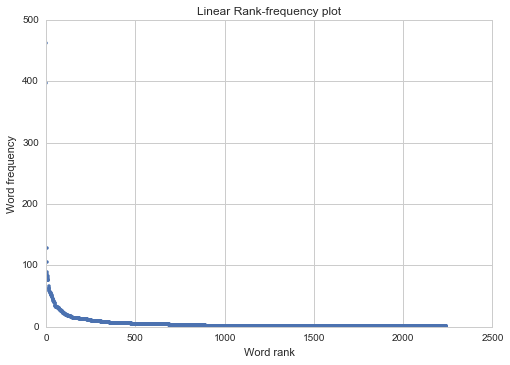

In [14]:
plt.plot(x,sorted(count_lemmas.values(),reverse=True),'.')
plt.xscale('linear')
plt.yscale('linear')
plt.grid(True,which='both')
plt.ylabel('Word frequency')
plt.xlabel('Word rank')
plt.title('Linear Rank-frequency plot')
plt.show()

The data distribution doesn't look like a straight line that's why the error is so high.

We can find log approximation and its error and compare them to the previous results.

In [15]:
X = [np.log(x) for x in sorted(count_lemmas.values(), reverse=True)]
Y = [np.log(y) for y in x]
coordinates = np.array([X, Y])
linregress(coordinates)

LinregressResult(slope=-0.92068398004830532, intercept=7.5452781381049716, rvalue=-0.97535957607078405, pvalue=0.0, stderr=0.0044011478289900634)

We can notice that the approximation error is less than the previous one. It is 0.0044011478289900634. The error is almost zero what means that the data is closer to a straight line, so Zipf's law works well on my data. Let's plot it to check it out once more.

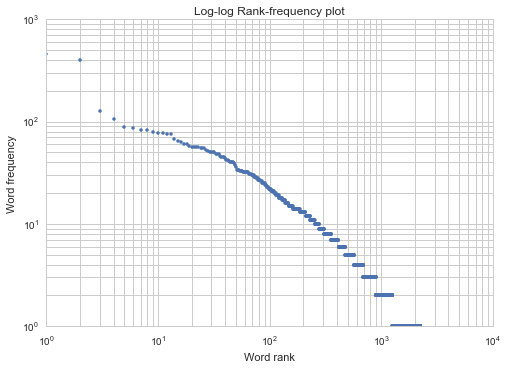

In [16]:
x = range(1,len(count_lemmas.values())+1)
plt.plot(x,sorted(count_lemmas.values(),reverse=True),'.')
plt.xscale('log')
plt.yscale('log')
plt.grid(True,which='both')
plt.ylabel('Word frequency')
plt.xlabel('Word rank')
plt.title('Log-log Rank-frequency plot')
plt.show()

## 2. Synonyms, antonyms and meronyms networks

### Synonyms and antonyms networks for "good"

Let's have a look at all the synsets of the word "good"

In [17]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
synsets = wn.synsets('good')
print(synsets)

[Synset('good.n.01'), Synset('good.n.02'), Synset('good.n.03'), Synset('commodity.n.01'), Synset('good.a.01'), Synset('full.s.06'), Synset('good.a.03'), Synset('estimable.s.02'), Synset('beneficial.s.01'), Synset('good.s.06'), Synset('good.s.07'), Synset('adept.s.01'), Synset('good.s.09'), Synset('dear.s.02'), Synset('dependable.s.04'), Synset('good.s.12'), Synset('good.s.13'), Synset('effective.s.04'), Synset('good.s.15'), Synset('good.s.16'), Synset('good.s.17'), Synset('good.s.18'), Synset('good.s.19'), Synset('good.s.20'), Synset('good.s.21'), Synset('well.r.01'), Synset('thoroughly.r.02')]


Now we can print synonyms for each synset

In [19]:
for ss in wn.synsets('good'):
    print(ss.name(), ss.lemma_names())

good.n.01 ['good']
good.n.02 ['good', 'goodness']
good.n.03 ['good', 'goodness']
commodity.n.01 ['commodity', 'trade_good', 'good']
good.a.01 ['good']
full.s.06 ['full', 'good']
good.a.03 ['good']
estimable.s.02 ['estimable', 'good', 'honorable', 'respectable']
beneficial.s.01 ['beneficial', 'good']
good.s.06 ['good']
good.s.07 ['good', 'just', 'upright']
adept.s.01 ['adept', 'expert', 'good', 'practiced', 'proficient', 'skillful', 'skilful']
good.s.09 ['good']
dear.s.02 ['dear', 'good', 'near']
dependable.s.04 ['dependable', 'good', 'safe', 'secure']
good.s.12 ['good', 'right', 'ripe']
good.s.13 ['good', 'well']
effective.s.04 ['effective', 'good', 'in_effect', 'in_force']
good.s.15 ['good']
good.s.16 ['good', 'serious']
good.s.17 ['good', 'sound']
good.s.18 ['good', 'salutary']
good.s.19 ['good', 'honest']
good.s.20 ['good', 'undecomposed', 'unspoiled', 'unspoilt']
good.s.21 ['good']
well.r.01 ['well', 'good']
thoroughly.r.02 ['thoroughly', 'soundly', 'good']


Let's collect all the synonyms and antonyms of the word "good"

In [20]:
synonyms = []
antonyms = []

for ss in wn.synsets("good"):
    for lemma in ss.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

print("Synonyms are: ", set(synonyms))
print("Antonyms are: ", set(antonyms))

Synonyms are:  {'adept', 'effective', 'unspoiled', 'skillful', 'near', 'in_effect', 'in_force', 'goodness', 'beneficial', 'dear', 'secure', 'commodity', 'sound', 'undecomposed', 'proficient', 'unspoilt', 'expert', 'skilful', 'thoroughly', 'respectable', 'ripe', 'well', 'safe', 'honest', 'salutary', 'upright', 'just', 'serious', 'honorable', 'full', 'dependable', 'right', 'good', 'estimable', 'trade_good', 'practiced', 'soundly'}
Antonyms are:  {'evilness', 'evil', 'badness', 'ill', 'bad'}


Let's create a network for synonyms

In [21]:
G=nx.DiGraph()
for syn in synonyms:
    G.add_edge("good",syn)
print(nx.info(G)) 

Name: 
Type: DiGraph
Number of nodes: 37
Number of edges: 37
Average in degree:   1.0000
Average out degree:   1.0000


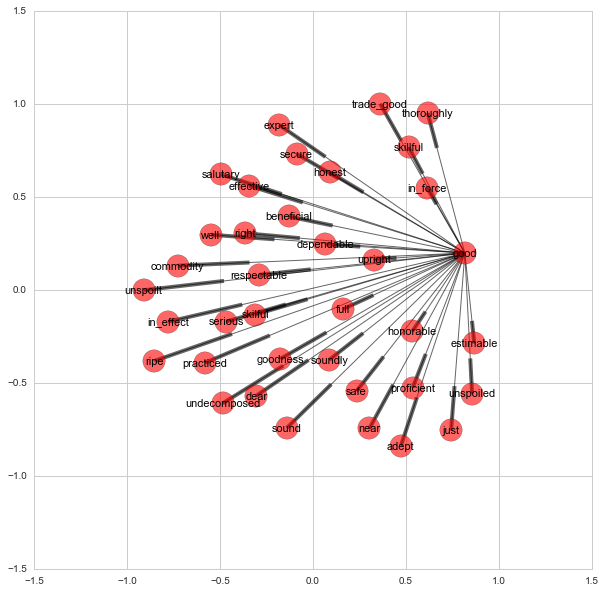

In [22]:
plt.figure(figsize=(10,10))
plt.axis('equal')
pos = nx.spring_layout(G,iterations=100)
nx.draw_networkx(G,pos=pos,with_labels=True,node_size=500,font_size=11,node_shape='o',alpha=0.6,node_color='red')

We will also create a network for antonyms of a given word

In [23]:
G=nx.DiGraph()
for ant in antonyms:
    G.add_edge("good",ant)
print(nx.info(G)) 

Name: 
Type: DiGraph
Number of nodes: 6
Number of edges: 5
Average in degree:   0.8333
Average out degree:   0.8333


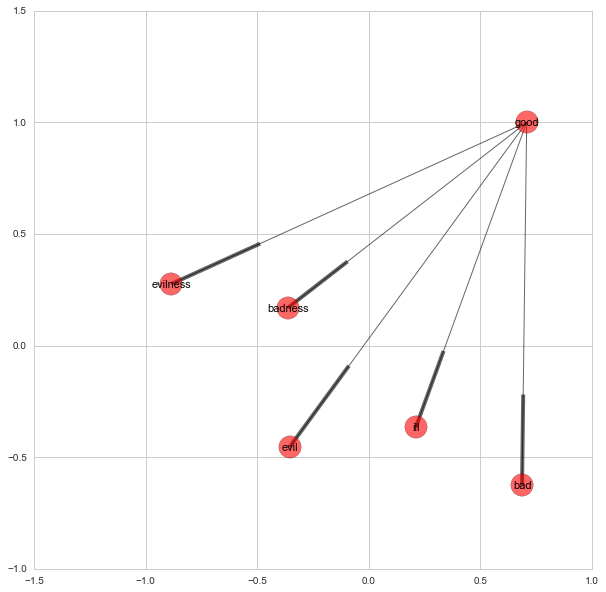

In [24]:
plt.figure(figsize=(10,10))
plt.axis('equal')
pos = nx.spring_layout(G,iterations=100)
nx.draw_networkx(G,pos=pos,with_labels=True,node_size=500,font_size=11,node_shape='o',alpha=0.6,node_color='red')

### Synonyms and antonyms networks for "bad"

We will do the same for the word "bad"

In [25]:
synsets = wn.synsets('bad')
print(synsets)

[Synset('bad.n.01'), Synset('bad.a.01'), Synset('bad.s.02'), Synset('bad.s.03'), Synset('bad.s.04'), Synset('regretful.a.01'), Synset('bad.s.06'), Synset('bad.s.07'), Synset('bad.s.08'), Synset('bad.s.09'), Synset('bad.s.10'), Synset('bad.s.11'), Synset('bad.s.12'), Synset('bad.s.13'), Synset('bad.s.14'), Synset('badly.r.05'), Synset('badly.r.06')]


In [26]:
for ss in wn.synsets('bad'):
    print(ss.name(), ss.lemma_names())

bad.n.01 ['bad', 'badness']
bad.a.01 ['bad']
bad.s.02 ['bad', 'big']
bad.s.03 ['bad', 'tough']
bad.s.04 ['bad', 'spoiled', 'spoilt']
regretful.a.01 ['regretful', 'sorry', 'bad']
bad.s.06 ['bad', 'uncollectible']
bad.s.07 ['bad']
bad.s.08 ['bad']
bad.s.09 ['bad', 'risky', 'high-risk', 'speculative']
bad.s.10 ['bad', 'unfit', 'unsound']
bad.s.11 ['bad']
bad.s.12 ['bad']
bad.s.13 ['bad', 'forged']
bad.s.14 ['bad', 'defective']
badly.r.05 ['badly', 'bad']
badly.r.06 ['badly', 'bad']


In [27]:
synonyms = []
antonyms = []

for ss in wn.synsets("bad"):
    for lemma in ss.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

print("Synonyms are: ", set(synonyms))
print("Antonyms are: ", set(antonyms))

Synonyms are:  {'unsound', 'badly', 'badness', 'risky', 'unfit', 'spoiled', 'sorry', 'forged', 'uncollectible', 'big', 'regretful', 'tough', 'defective', 'bad', 'spoilt', 'high-risk', 'speculative'}
Antonyms are:  {'good', 'goodness', 'unregretful'}


In [28]:
G=nx.DiGraph()
for syn in synonyms:
    G.add_edge("bad",syn)
print(nx.info(G)) 

Name: 
Type: DiGraph
Number of nodes: 17
Number of edges: 17
Average in degree:   1.0000
Average out degree:   1.0000


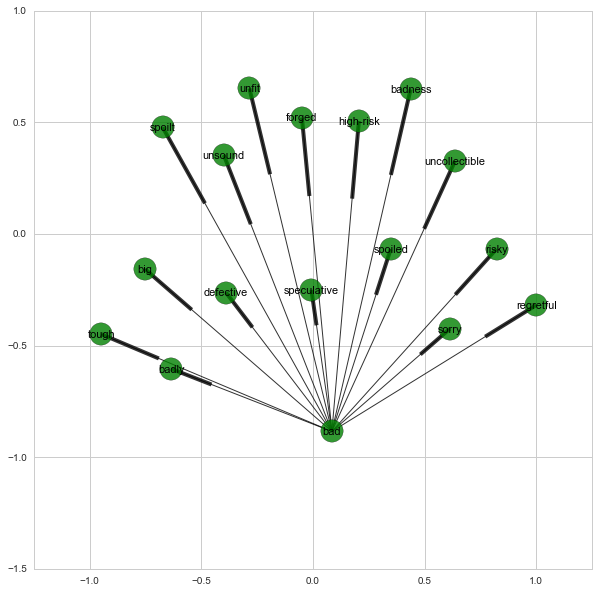

In [29]:
plt.figure(figsize=(10,10))
plt.axis('equal')
pos = nx.spring_layout(G,iterations=100)
nx.draw_networkx(G,pos=pos,with_labels=True,node_size=500,font_size=11,node_shape='o',alpha=0.8,node_color='green')

In [30]:
G=nx.DiGraph()
for ant in antonyms:
    G.add_edge("bad",ant)
print(nx.info(G)) 

Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 3
Average in degree:   0.7500
Average out degree:   0.7500


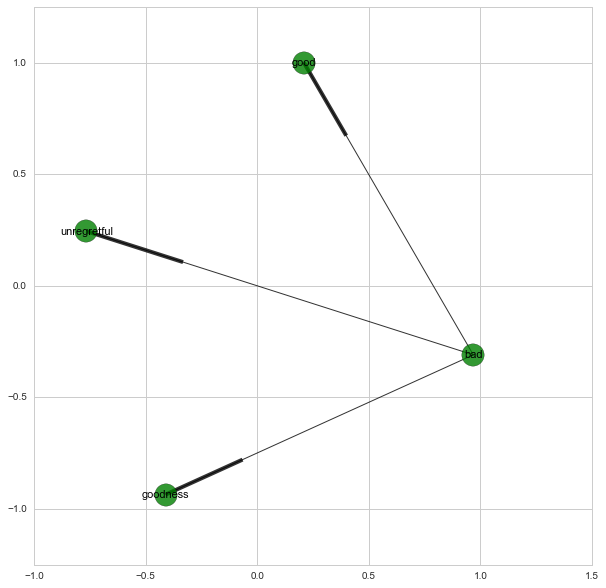

In [31]:
plt.figure(figsize=(10,10))
plt.axis('equal')
pos = nx.spring_layout(G,iterations=100)
nx.draw_networkx(G,pos=pos,with_labels=True,node_size=500,font_size=11,node_shape='o',alpha=0.8,node_color='green')

### Synonyms and antonyms networks for two keywords from Wonderland

Let's take two most frequent words from Wonderland: "said" and "little". The word "alice" is actually the second frequent word from the book but it's a proper name and doesn't seem to be in WordNet.

#### Synonyms and antonyms networks for "said"

In [32]:
synsets = wn.synsets('said')
print(synsets)

[Synset('state.v.01'), Synset('allege.v.01'), Synset('suppose.v.01'), Synset('read.v.02'), Synset('order.v.01'), Synset('pronounce.v.01'), Synset('say.v.07'), Synset('say.v.08'), Synset('say.v.09'), Synset('say.v.10'), Synset('say.v.11'), Synset('aforesaid.s.01')]


In [33]:
for ss in wn.synsets('said'):
    print(ss.name(), ss.lemma_names())

state.v.01 ['state', 'say', 'tell']
allege.v.01 ['allege', 'aver', 'say']
suppose.v.01 ['suppose', 'say']
read.v.02 ['read', 'say']
order.v.01 ['order', 'tell', 'enjoin', 'say']
pronounce.v.01 ['pronounce', 'articulate', 'enounce', 'sound_out', 'enunciate', 'say']
say.v.07 ['say']
say.v.08 ['say']
say.v.09 ['say']
say.v.10 ['say']
say.v.11 ['say']
aforesaid.s.01 ['aforesaid', 'aforementioned', 'said']


In [34]:
synonyms = []
antonyms = []

for ss in wn.synsets("said"):
    for lemma in ss.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

print("Synonyms are: ", set(synonyms))
print("Antonyms are: ", set(antonyms))

Synonyms are:  {'pronounce', 'aver', 'enounce', 'sound_out', 'order', 'aforementioned', 'say', 'articulate', 'enunciate', 'said', 'state', 'suppose', 'aforesaid', 'read', 'enjoin', 'tell', 'allege'}
Antonyms are:  set()


There is no antonyms for "said". Lucky us!

In [35]:
G=nx.DiGraph()
for syn in synonyms:
    G.add_edge("said",syn)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 17
Number of edges: 17
Average in degree:   1.0000
Average out degree:   1.0000


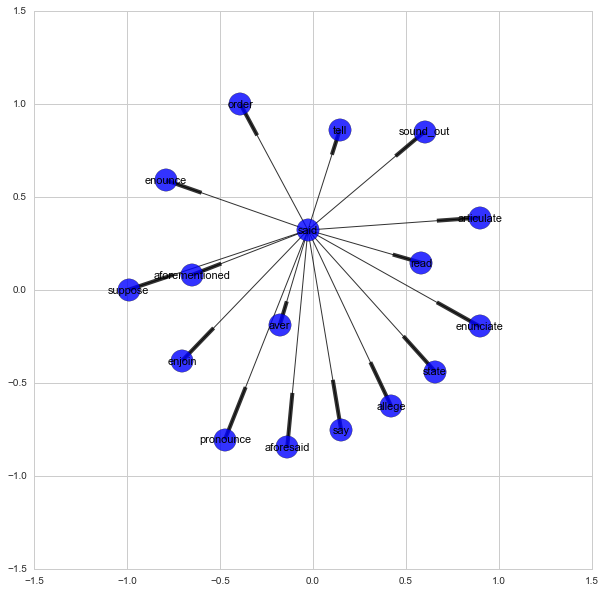

In [36]:
plt.figure(figsize=(10,10))
plt.axis('equal')
pos = nx.spring_layout(G,iterations=100)
nx.draw_networkx(G,pos=pos,with_labels=True,node_size=500,font_size=11,node_shape='o',alpha=0.8,node_color='blue')

#### Synonyms and antonyms networks for "little"

In [37]:
for ss in wn.synsets('little'):
    print(ss.name(), ss.lemma_names())

little.n.01 ['little']
small.a.01 ['small', 'little']
little.a.02 ['little', 'slight']
little.s.03 ['little', 'small']
fiddling.s.01 ['fiddling', 'footling', 'lilliputian', 'little', 'niggling', 'piddling', 'piffling', 'petty', 'picayune', 'trivial']
little.s.05 ['little', 'small']
short.a.03 ['short', 'little']
little.s.07 ['little', 'minuscule', 'small']
little.s.08 ['little']
little.r.01 ['little']


In [38]:
synonyms = []
antonyms = []

for ss in wn.synsets("little"):
    for lemma in ss.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

print("Synonyms are: ", set(synonyms))
print("Antonyms are: ", set(antonyms))

Synonyms are:  {'little', 'piddling', 'trivial', 'minuscule', 'picayune', 'petty', 'piffling', 'slight', 'lilliputian', 'short', 'footling', 'fiddling', 'niggling', 'small'}
Antonyms are:  {'large', 'big', 'much', 'tall'}


In [39]:
G=nx.DiGraph()
for syn in synonyms:
    G.add_edge("little",syn)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 14
Number of edges: 14
Average in degree:   1.0000
Average out degree:   1.0000


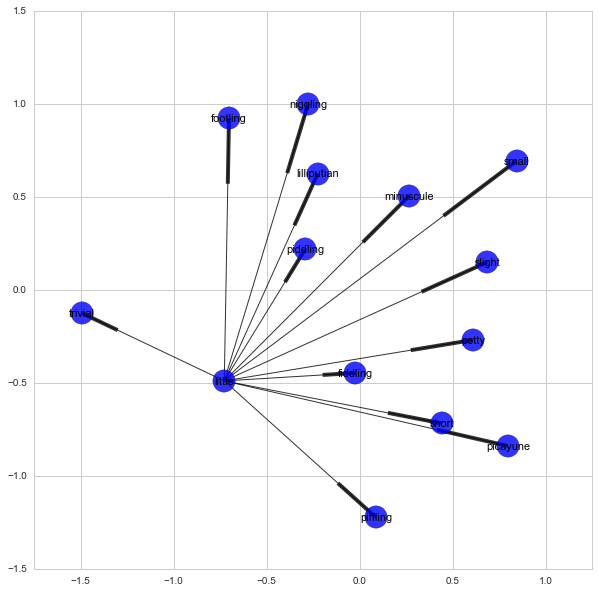

In [40]:
plt.figure(figsize=(10,10))
plt.axis('equal')
pos = nx.spring_layout(G,iterations=100)
nx.draw_networkx(G,pos=pos,with_labels=True,node_size=500,font_size=11,node_shape='o',alpha=0.8,node_color='blue')

In [41]:
G=nx.DiGraph()
for ant in antonyms:
    G.add_edge("little",ant)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 4
Average in degree:   0.8000
Average out degree:   0.8000


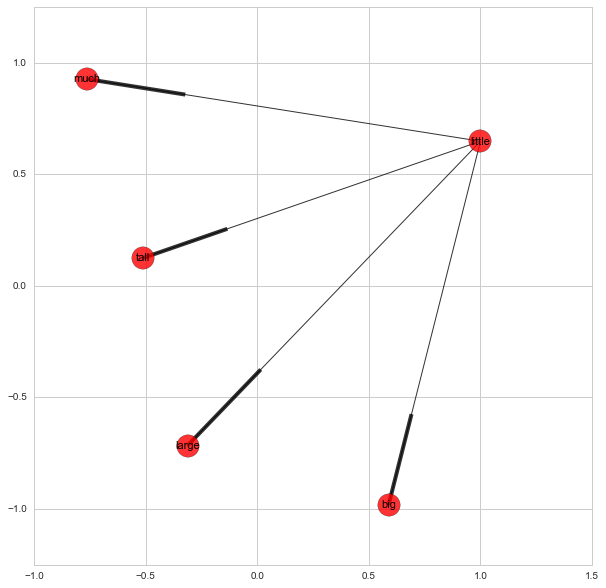

In [42]:
plt.figure(figsize=(10,10))
plt.axis('equal')
pos = nx.spring_layout(G,iterations=100)
nx.draw_networkx(G,pos=pos,with_labels=True,node_size=500,font_size=11,node_shape='o',alpha=0.8,node_color='red')

### Meronyms network for "car"

Now we can build a graph for meronymy network for the word "car"

In [43]:
words = wn.synsets('car')
meronyms = words[0].part_meronyms()

In [44]:
print(meronyms)

[Synset('accelerator.n.01'), Synset('air_bag.n.01'), Synset('auto_accessory.n.01'), Synset('automobile_engine.n.01'), Synset('automobile_horn.n.01'), Synset('buffer.n.06'), Synset('bumper.n.02'), Synset('car_door.n.01'), Synset('car_mirror.n.01'), Synset('car_seat.n.01'), Synset('car_window.n.01'), Synset('fender.n.01'), Synset('first_gear.n.01'), Synset('floorboard.n.02'), Synset('gasoline_engine.n.01'), Synset('glove_compartment.n.01'), Synset('grille.n.02'), Synset('high_gear.n.01'), Synset('hood.n.09'), Synset('luggage_compartment.n.01'), Synset('rear_window.n.01'), Synset('reverse.n.02'), Synset('roof.n.02'), Synset('running_board.n.01'), Synset('stabilizer_bar.n.01'), Synset('sunroof.n.01'), Synset('tail_fin.n.02'), Synset('third_gear.n.01'), Synset('window.n.02')]


In [45]:
G=nx.DiGraph()
for w in words[0].part_meronyms(): G.add_edge(words[0].name().split('.')[0],w.name().split('.')[0])
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 30
Number of edges: 29
Average in degree:   0.9667
Average out degree:   0.9667


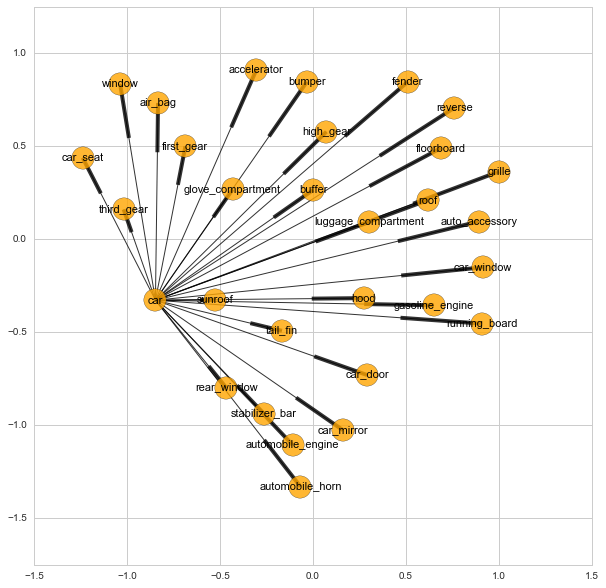

In [46]:
plt.figure(figsize=(10,10))
plt.axis('equal')
pos = nx.spring_layout(G,iterations=100)
nx.draw_networkx(G,pos=pos,with_labels=True,node_size=500,font_size=11,node_shape='o',alpha=0.8,node_color='orange')

## 3. Co-occurence network

### Co-occurence network for Alice in Wonderland

In [47]:
bigrams=list(ngrams(lemmas,2))
print(len(bigrams))

12242


In [48]:
counts = Counter(bigrams)
bigrams_10 = counts.most_common(10)
print(bigrams_10)

[(('said', 'alice'), 123), (('mock', 'turtle'), 56), (('march', 'hare'), 31), (('said', 'king'), 29), (('thought', 'alice'), 26), (('said', 'hatter'), 22), (('white', 'rabbit'), 22), (('said', 'mock'), 20), (('said', 'caterpillar'), 18), (('said', 'gryphon'), 18)]


In [49]:
GN=nx.Graph()
for x in bigrams_10: GN.add_edge(x[0][0],x[0][1],weight=x[1])
print(nx.info(GN))

Name: 
Type: Graph
Number of nodes: 13
Number of edges: 10
Average degree:   1.5385


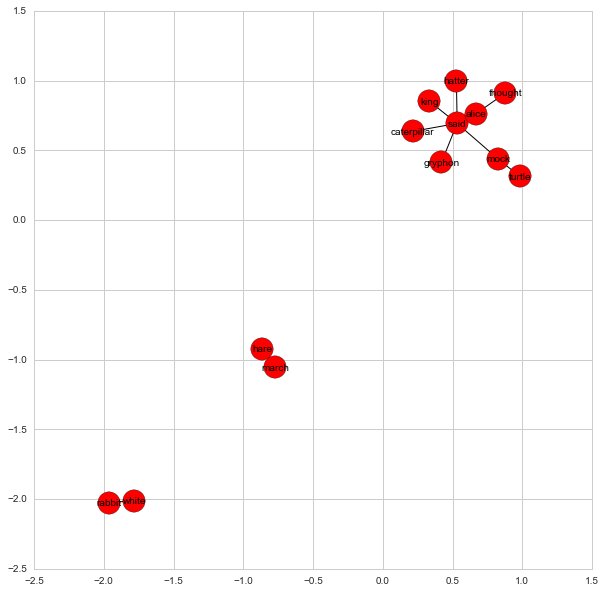

In [50]:
plt.figure(figsize=(10,10))
plt.axis('equal')
nx.draw_networkx(GN,with_labels=True,node_size=500,font_size=10)

In [51]:
A = nx.adjacency_matrix(GN)

In [52]:
print(A.todense())

[[  0   0   0   0   0   0   0   0  22   0   0   0   0]
 [  0   0   0  22   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  20   0   0   0  56]
 [  0  22   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  31   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  18   0   0   0   0]
 [  0   0   0   0  31   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  18   0   0   0   0]
 [ 22   0  20   0   0  18   0  18   0 123  29   0   0]
 [  0   0   0   0   0   0   0   0 123   0   0  26   0]
 [  0   0   0   0   0   0   0   0  29   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  26   0   0   0]
 [  0   0  56   0   0   0   0   0   0   0   0   0   0]]


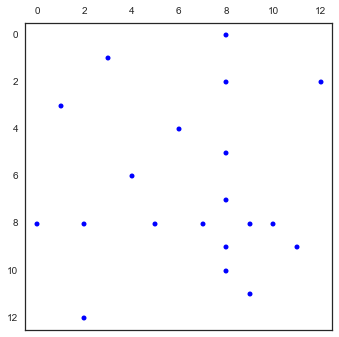

In [53]:
sns.set(style="white")
plt.spy(A, precision=0, marker='.', markersize=10)
plt.show()

In [54]:
df = nx.to_pandas_dataframe(GN)

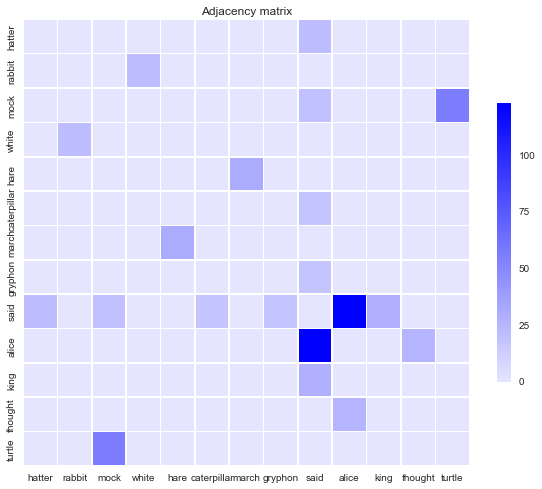

In [55]:
cmap=sns.light_palette(color='blue',n_colors=6,as_cmap=True)
plt.figure(figsize=(10,10))
plt.title('Adjacency matrix')
sns.heatmap(df,square=True,annot=False,cmap=cmap,linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Let's find collocations!
We'll use collocations module in nltk.

In [56]:
from nltk.collocations import *

In [57]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(lemmas)
collocations = finder.score_ngrams(bigram_measures.raw_freq)

We'll print the first ten collocations.

In [58]:
for collocation in collocations[:10]:
    print(collocation)

(('said', 'alice'), 0.010046557216368537)
(('mock', 'turtle'), 0.004574042309891366)
(('march', 'hare'), 0.0025320591358327206)
(('said', 'king'), 0.002368700481908029)
(('thought', 'alice'), 0.0021236625010209917)
(('said', 'hatter'), 0.0017969451931716084)
(('white', 'rabbit'), 0.0017969451931716084)
(('said', 'mock'), 0.0016335865392469167)
(('said', 'caterpillar'), 0.001470227885322225)
(('said', 'gryphon'), 0.001470227885322225)


It turned out that they are the same as ten bigrams we found previously. So, let's take next ten collocations and build a graph with orange nodes.

In [59]:
for collocation in collocations[10:20]:
    print(collocation)

(('alice', 'said'), 0.001388548558359879)
(('said', 'duchess'), 0.0012251899044351876)
(('said', 'cat'), 0.0011435105774728416)
(('alice', 'thought'), 0.0010618312505104959)
(('said', 'queen'), 0.0010618312505104959)
(('minute', 'two'), 0.00098015192354815)
(('alice', 'could'), 0.0008984725965858042)
(('king', 'said'), 0.0008984725965858042)
(('poor', 'alice'), 0.0008984725965858042)
(('oh', 'dear'), 0.0008167932696234583)


In [60]:
GC=nx.Graph()
for x in collocations[10:20]: GC.add_edge(x[0][0],x[0][1],weight=x[1])
print(nx.info(GC))

Name: 
Type: Graph
Number of nodes: 13
Number of edges: 10
Average degree:   1.5385


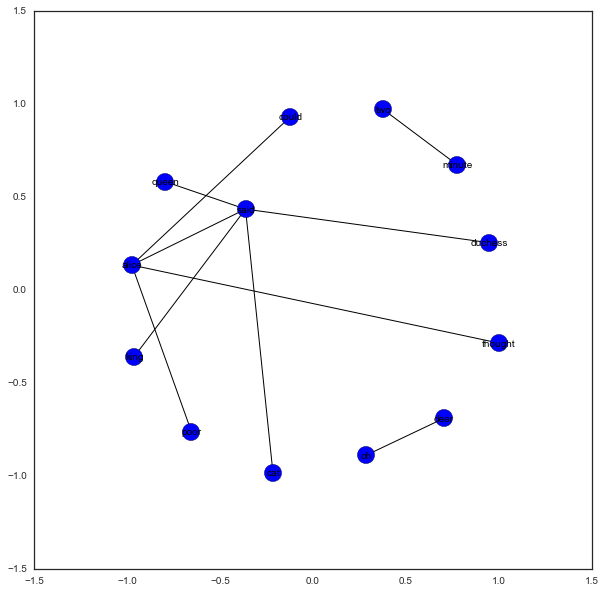

In [61]:
plt.figure(figsize=(10,10))
plt.axis('equal')
nx.draw_networkx(GC,with_labels=True,node_size=300,font_size=10,node_color='blue')

Now we are ready to build a spy-plot and a heatmap of an adjacency matrix

In [62]:
A = nx.adjacency_matrix(GC)
print(A.todense())

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.00106183  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.00081679]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.00098015  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.00089847  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.00122519  0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.00106183  0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.00122519  0.00106183
   0.   

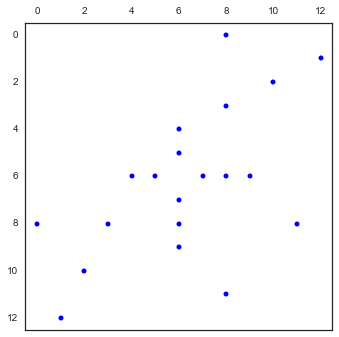

In [63]:
sns.set(style="white")
plt.spy(A, precision=0, marker='.', markersize=10)
plt.show()

In [64]:
df = nx.to_pandas_dataframe(GC)

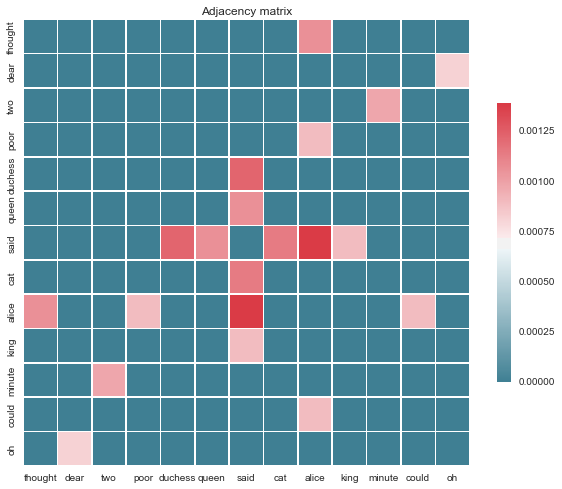

In [65]:
cmap=sns.diverging_palette(220, 10,as_cmap=True)

plt.figure(figsize=(10,10))
plt.title('Adjacency matrix')
sns.heatmap(df,square=True,annot=False,cmap=cmap,linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## 4.Network properties

#### Node degree distribution

At first, when I calculated everything for 10 most frequent bigrams of my corpus I faced a problem - the graph wasn't connected. So it was impossible to calculate its center, periphery, diametry and the shortest path. Then I came up with an idea to calculate all of these metrics for all bigrams from the text. Here we go!

In [66]:
G1=nx.Graph()
G1.add_edges_from(bigrams)
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 2241
Number of edges: 9870
Average degree:   8.8086


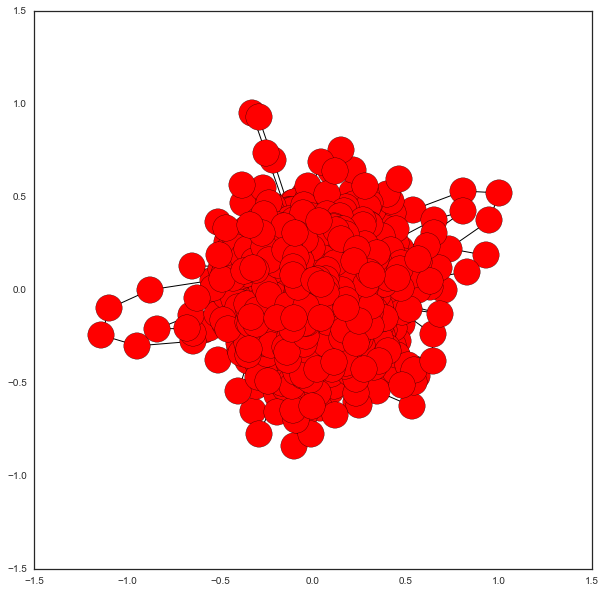

In [67]:
plt.figure(figsize=(10,10))
plt.axis('equal')
nx.draw_networkx(G1,with_labels=False,node_size=700,font_size=10)
plt.show()

Looks beautiful! We'll print 10 most frequent nodes names.

In [68]:
print(sorted(nx.degree(G1).items(),reverse=True,key = itemgetter(1))[:10])

[('alice', 369), ('said', 350), ('little', 170), ('one', 149), ('know', 129), ('time', 128), ('like', 124), ('would', 124), ('went', 120), ('thing', 108)]


In [69]:
d=nx.degree_histogram(G1)
c = range(0,len(d),1)

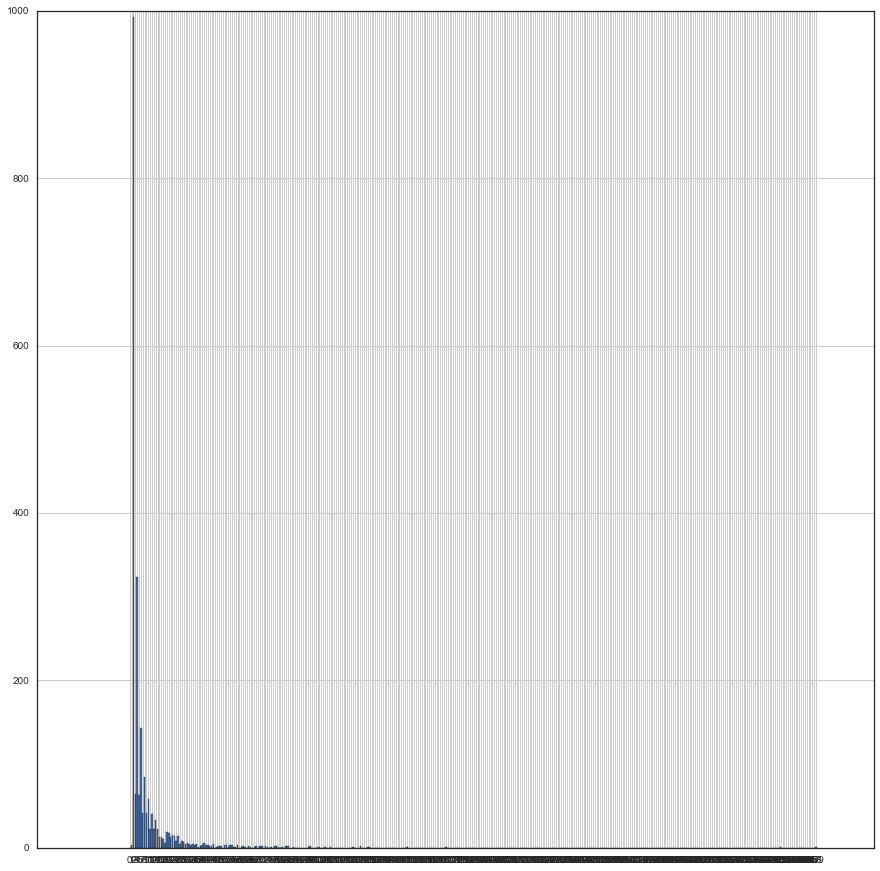

In [70]:
plt.figure(figsize=(15,15))
plt.bar(c,d,align='center')
plt.xticks(c)
plt.grid(True,which='both')
plt.show()

#### Small diameter

Let's check whether the graph is connected or not

In [71]:
print(nx.is_connected(G1))

True


Lucky us! It's connected so we can calculate its center, periphery, diametry and the shortest path.

In [72]:
print(nx.center(G1))
print(nx.periphery(G1))

['trial', 'sit', 'dinah', 'explain', 'could', 'began', 'noticed', 'old', 'know', 'word', 'alice', 'middle', 'right', 'exactly', 'drew', 'gave', 'going', 'look', 'dear', 'cook', 'think', 'king', 'oh', 'indeed', 'speak', 'say', 'jury', 'went', 'grow', 'perhaps', 'air', 'grown', 'see', 'high', 'time', 'finished', 'may', 'queen', 'found', 'got', 'replied', 'like', 'one', 'said', 'eye', 'heard', 'first', 'stair', 'u', 'rabbit', 'lesson', 'else', 'come', 'alone', 'way', 'get', 'severely', 'make', 'wonder', 'came', 'go', 'minute', 'white', 'little', 'looking', 'would', 'politely', 'never', 'large', 'looked', 'thing', 'behind', 'made', 'enough', 'lory', 'mock', 'two', 'cat', 'mouse', 'dormouse', 'seemed', 'hand', 'course', 'ran', 'voice', 'hatter']
['immediate', 'millennium', 'earl']


In [73]:
print (nx.diameter(G1))

9


In [74]:
print (nx.average_shortest_path_length(G1))

3.315670618983872


#### Clustering coefficient

We can also have a look at clustering coefficient.

In [75]:
print (sum(nx.triangles(G1).values())/3)
print (nx.average_clustering(G1))
print (nx.transitivity(G1))

8823.0
0.1167020435584281
0.06107248911521148


### Centralities

Finally we are ready to compute different centrality metrics and plot the graph.

In [76]:
dcent = nx.degree_centrality(G1)
print(sorted(dcent.items(),reverse=True,key = itemgetter(1))[:10])

[('alice', 0.16473214285714285), ('said', 0.15625), ('little', 0.07589285714285714), ('one', 0.06651785714285714), ('know', 0.05758928571428571), ('time', 0.05714285714285714), ('like', 0.055357142857142855), ('would', 0.055357142857142855), ('went', 0.05357142857142857), ('thing', 0.04821428571428571)]


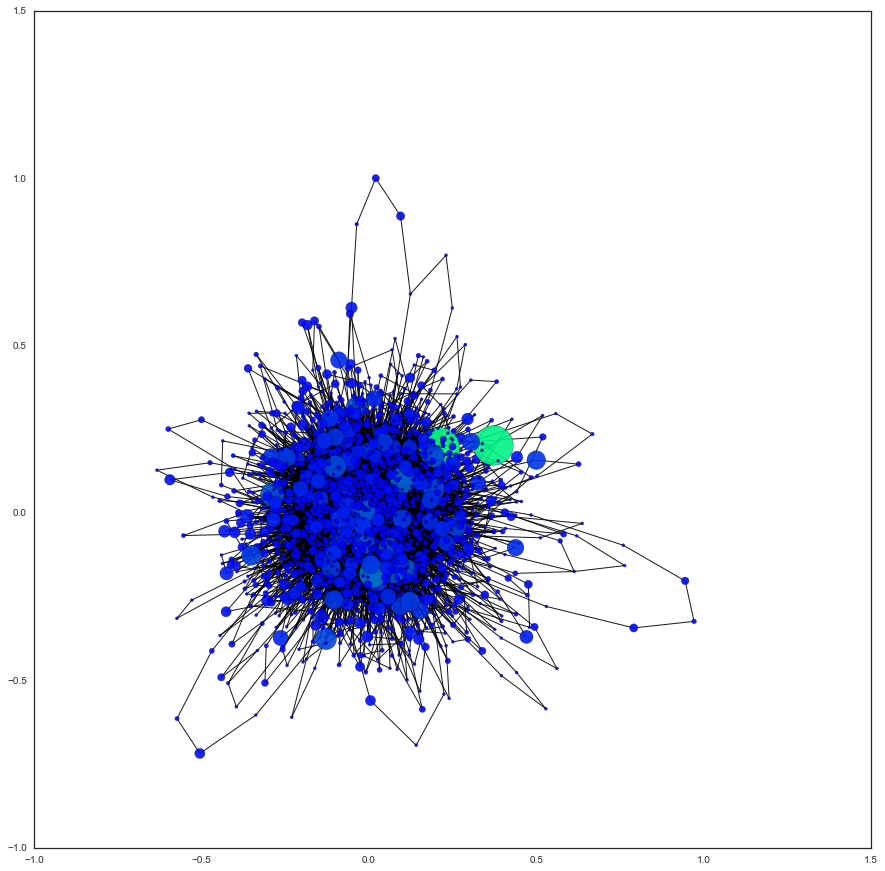

In [77]:
sizes = [x*10000 for x in dcent.values()]
colors = [float(x) for x in dcent.values()]
plt.figure(figsize=(15,15))
plt.axis('equal')
nx.draw_networkx(G1,with_labels=False,node_size=sizes,node_color = colors,cmap = plt.cm.winter,font_size=10,alpha=0.9)

In [78]:
bcent=nx.betweenness_centrality(G1)
print(sorted(bcent.items(),reverse=True,key = itemgetter(1))[:10])

[('alice', 0.17574296981159898), ('said', 0.1572763425302381), ('little', 0.05694732163180047), ('one', 0.04990638282142151), ('like', 0.035588089575517574), ('would', 0.03417728660253246), ('time', 0.033095919690469607), ('went', 0.028641284387553152), ('know', 0.027438046931404284), ('queen', 0.026359224790069614)]


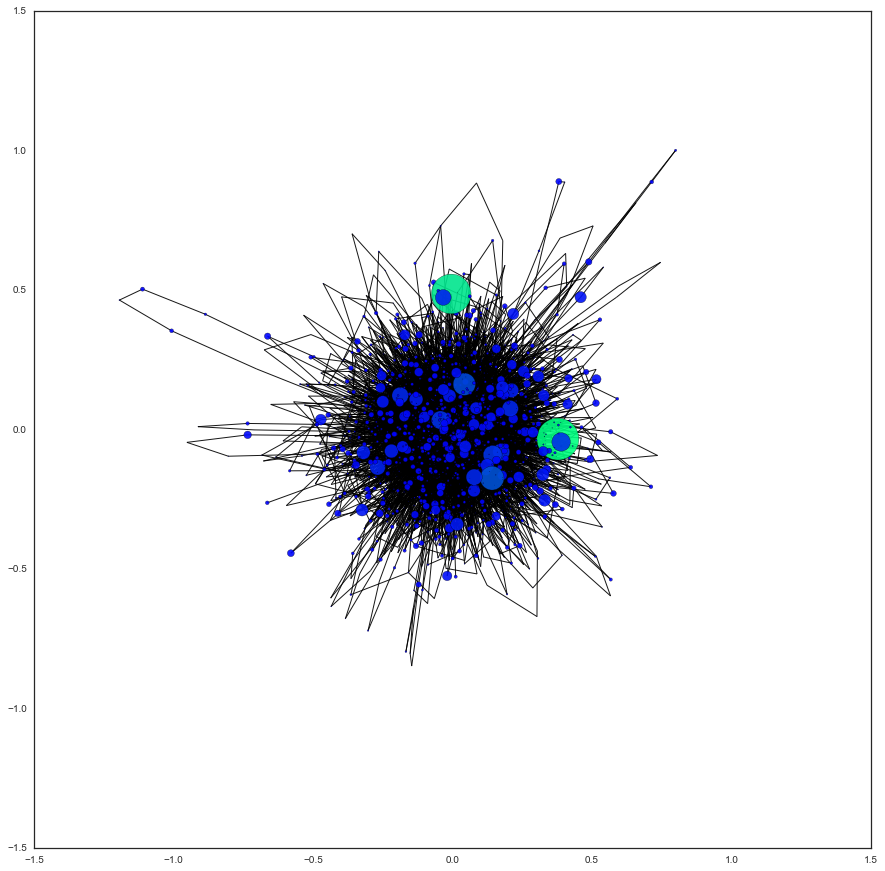

In [79]:
sizes = [x*10000 for x in bcent.values()]
colors = [float(x) for x in bcent.values()]
plt.figure(figsize=(15,15))
plt.axis('equal')
nx.draw_networkx(G1,with_labels=False,node_size=sizes,node_color = colors,cmap = plt.cm.winter,font_size=10,alpha=0.9)

In [80]:
ccent=nx.closeness_centrality(G1)
print(sorted(ccent.items(),reverse=True,key = itemgetter(1))[:10])

[('alice', 0.49645390070921985), ('said', 0.492415915585843), ('little', 0.43827039718254746), ('one', 0.4375854659113108), ('time', 0.4359673024523161), ('like', 0.43101789493938814), ('would', 0.43052085335383433), ('went', 0.4303554274735831), ('know', 0.42748091603053434), ('see', 0.42480561350274987)]


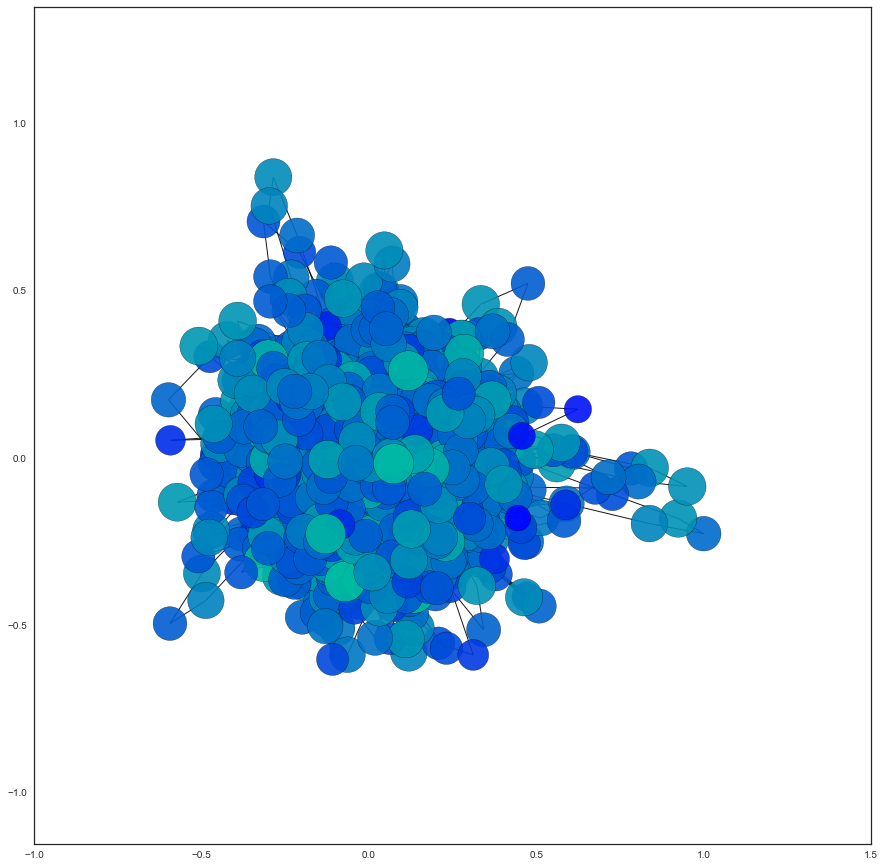

In [81]:
sizes = [x*4000 for x in ccent.values()]
colors = [float(x) for x in ccent.values()]
plt.figure(figsize=(15,15))
plt.axis('equal')
nx.draw_networkx(G1,with_labels=False,node_size=sizes,node_color = colors,cmap = plt.cm.winter,font_size=10,alpha=0.9)

In [82]:
ecent=nx.eigenvector_centrality_numpy(G1)
print(sorted(ecent.items(),reverse=True,key = itemgetter(1))[:10])

[('alice', 0.30469539678530616), ('said', 0.28634001615147053), ('time', 0.14229083417638352), ('know', 0.1400707688981364), ('little', 0.13728958858900583), ('one', 0.1359439330800875), ('see', 0.1316843489521312), ('went', 0.1312508242399229), ('like', 0.13029358260836713), ('would', 0.1282177594469035)]


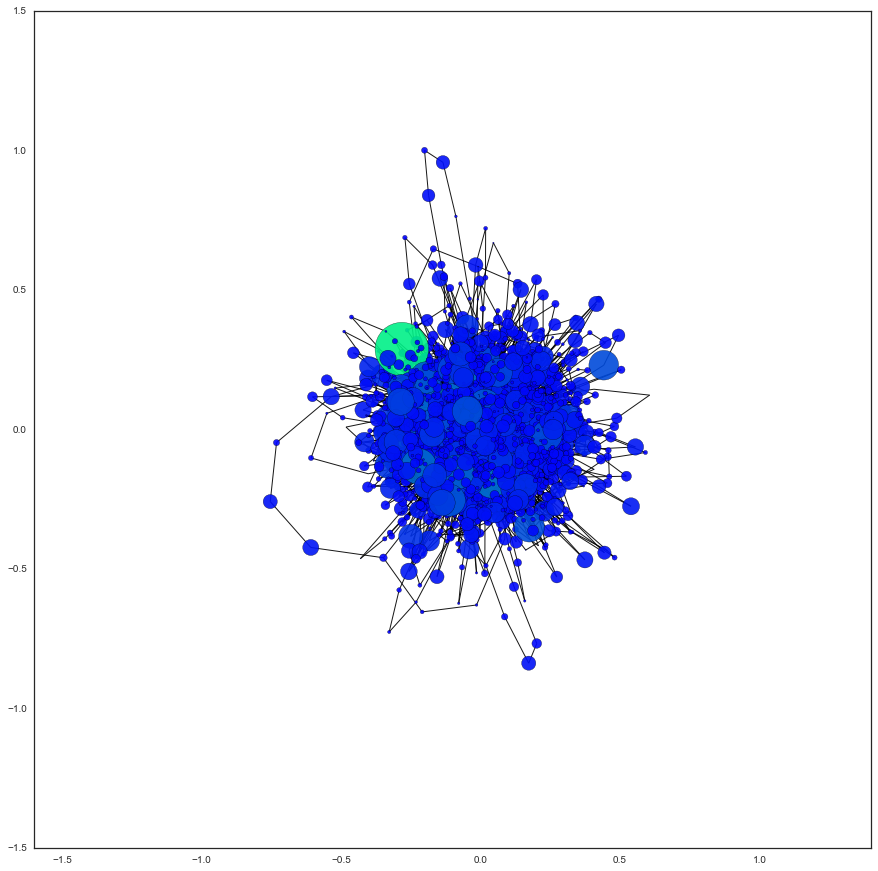

In [83]:
sizes = [x*10000 for x in ecent.values()]
colors = [float(x) for x in ecent.values()]
plt.figure(figsize=(15,15))
plt.axis('equal')
nx.draw_networkx(G1,with_labels=False,node_size=sizes,node_color = colors,cmap = plt.cm.winter,font_size=10,alpha=0.9)

In [84]:
df2=pd.DataFrame(data=[dcent,bcent,ccent,ecent]).transpose()
df2.columns=['Degree centrality','Betweenness centrality','Closensess centrality', 'Eigencentrality']
df2.sort_values("Eigencentrality", ascending=False,inplace=True)
df2.head()

,Degree centrality,Betweenness centrality,Closensess centrality,Eigencentrality
alice,0.164732,0.175743,0.496454,0.304695
said,0.156250,0.157276,0.492416,0.286340
time,0.057143,0.033096,0.435967,0.142291
know,0.057589,0.027438,0.427481,0.140071
little,0.075893,0.056947,0.438270,0.137290


In [85]:
df2.to_csv('centralities.csv')